<a class="anchor" id="0"></a>
# ** Comperhensive look at Random Forest  **
Created By Sir Masoud Imani

Random Forest is a supervised machine learning algorithm which is based on ensemble learning. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. 


` Only Dr.Bodagh can judge me`

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Random Forest algorithm](#1)
2.	[Random Forest algorithm intuition](#2)
3.	[Advantages and disadvantages of Random Forest algorithm](#3)
4.	[Feature selection with Random Forests](#4)
5.	[Difference between Random Forests and Decision-Trees](#5)
6.	[Relationship to nearest neighbours](#6)
7.	[Import libraries](#7)
8.	[Import dataset](#8)
9.	[Exploratory data analysis](#9)
10.	[Declare feature vector and target variable](#10)
11.	[Split data into separate training and test set](#11)
12.	[Feature engineering](#12)
13.	[Random Forest Classifier model with default parameters](#13)
14.	[Random Forest Classifier model with parameter n_estimators=100](#14)
15.	[Find important features with Random Forest model](#15)
16.	[Visualize the feature scores of the features](#16)
17.	[Build the Random Forest model on selected features](#17)
18.	[Confusion matrix](#18)
19.	[Classification report](#19)
20.	[Results and conclusion](#20)
21. [References](#21)

# **1. Introduction to Random Forest algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.


Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name `Random Forest`. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.



# **2. Random Forest algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


### Random Forest algorithm intuition

![Random Forest](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

# **3. Advantages and disadvantages of Random Forest algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


The advantages of Random forest algorithm are as follows:-


1.	Random forest algorithm can be used to solve both classification and regression problems.
2.	It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3.	Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem. 
4.	Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5.	Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-


1.	The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2.	The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


# **4. Feature selection with Random Forests** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 


We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest. 


The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building. 


# **5. Difference between Random Forests and Decision Trees** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

1. Random forests is a set of multiple decision-trees.

2. Decision-trees are computationally faster as compared to random forests.

3. Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

4. Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

# **6. Relationship to nearest neighbours** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline



In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [3]:
data = 'CVD_cleaned.csv'

df = pd.read_csv(data)

# **9. Exploratory data analysis** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(308854, 19)

We can see that there are 308855 instances and 19 variables in the data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [7]:
col_names = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Height_(cm)','Weight_(kg)','BMI','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']


for col in col_names:
    
    print(df[col].value_counts())   


Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64
Yes    239381
No      69473
Name: Exercise, dtype: int64
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64
No     278976
Yes     29878
Name: Other_Cancer, dtype: int64
No     246953
Yes     61901
Name: Depression, dtype: int64
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64
No     207783
Yes    101071
Name: Arthritis, dtype: int64
Female    160196
Male      148658
Name: Sex, dtype: int64
65-69    33

### Explore `dependent` variable

In [8]:
df['Heart_Disease'].value_counts()

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

### Missing values in variables

In [9]:
# check missing values in variables

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [10]:
X = df.drop(['Heart_Disease'], axis=1)

y = df['Heart_Disease']

In [11]:
y.value_counts()

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [12]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((206932, 18), (101922, 18))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [14]:
# check data types in X_train

X_train.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [15]:
X_train.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
31654,Excellent,Within the past year,Yes,No,Yes,No,No,No,Female,55-59,168.0,71.67,25.50,Yes,0.0,60.0,30.0,1.0
267273,Good,Within the past 2 years,Yes,No,No,No,"No, pre-diabetes or borderline diabetes",No,Female,25-29,168.0,86.18,30.67,No,1.0,16.0,20.0,16.0
103296,Very Good,Within the past year,Yes,No,No,No,No,No,Female,70-74,170.0,90.72,31.32,Yes,0.0,120.0,12.0,0.0
282998,Very Good,Within the past 2 years,Yes,Yes,No,No,No,Yes,Female,65-69,165.0,63.50,23.30,No,0.0,60.0,2.0,4.0
293845,Good,Within the past year,No,No,No,No,No,Yes,Female,50-54,160.0,86.18,33.66,No,0.0,30.0,20.0,15.0


We can see that all  the variables are ordinal categorical data type.

In [16]:
df['Heart_Disease'] = df['Heart_Disease'].apply(lambda val:1 if val=='Yes' else 0)
df['Exercise'] = df['Exercise'].apply(lambda val:1 if val=='Yes' else 0)
df['Skin_Cancer'] = df['Skin_Cancer'].apply(lambda val:1 if val=='Yes' else 0)
df['Other_Cancer'] = df['Other_Cancer'].apply(lambda val:1 if val=='Yes' else 0)
df['Arthritis'] = df['Arthritis'].apply(lambda val:1 if val=='Yes' else 0)
df['Sex'] = df['Sex'].apply(lambda val:1 if val=='Female' else 0)
df['Smoking_History'] = df['Smoking_History'].apply(lambda val:1 if val=='Yes' else 0)


In [17]:
y = df['Heart_Disease']

In [18]:
y.value_counts()

0    283883
1     24971
Name: Heart_Disease, dtype: int64

In [19]:
X = df.drop(['Heart_Disease'], axis=1)

y = df['Heart_Disease']

In [20]:
X_train.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
31654,Excellent,Within the past year,Yes,No,Yes,No,No,No,Female,55-59,168.0,71.67,25.50,Yes,0.0,60.0,30.0,1.0
267273,Good,Within the past 2 years,Yes,No,No,No,"No, pre-diabetes or borderline diabetes",No,Female,25-29,168.0,86.18,30.67,No,1.0,16.0,20.0,16.0
103296,Very Good,Within the past year,Yes,No,No,No,No,No,Female,70-74,170.0,90.72,31.32,Yes,0.0,120.0,12.0,0.0
282998,Very Good,Within the past 2 years,Yes,Yes,No,No,No,Yes,Female,65-69,165.0,63.50,23.30,No,0.0,60.0,2.0,4.0
293845,Good,Within the past year,No,No,No,No,No,Yes,Female,50-54,160.0,86.18,33.66,No,0.0,30.0,20.0,15.0


In [21]:
X_test.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
302051,Very Good,Within the past year,Yes,No,No,No,No,Yes,Male,60-64,178.0,86.18,27.26,No,12.0,30.0,16.0,8.0
59950,Very Good,Within the past year,No,No,No,No,No,Yes,Female,70-74,165.0,79.38,29.12,No,0.0,60.0,60.0,12.0
203639,Good,Within the past year,No,No,No,No,No,Yes,Female,60-64,168.0,72.57,25.82,Yes,6.0,0.0,20.0,0.0
78768,Very Good,Within the past year,Yes,No,No,No,No,No,Male,25-29,183.0,93.89,28.07,Yes,0.0,60.0,8.0,2.0
216156,Fair,Within the past year,Yes,Yes,No,Yes,"No, pre-diabetes or borderline diabetes",Yes,Female,55-59,160.0,54.43,21.26,Yes,0.0,20.0,6.0,15.0


We now have training and test set ready for model building. 

In [22]:
X = df.drop(['Heart_Disease','General_Health','Checkup','Age_Category','Depression','Diabetes'], axis=1)
y = df['Heart_Disease']

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape


((206932, 13), (101922, 13))

In [24]:
X_train

,Exercise,Skin_Cancer,Other_Cancer,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
31654,1,0,1,0,1,168.0,71.67,25.50,1,0.0,60.0,30.0,1.0
267273,1,0,0,0,1,168.0,86.18,30.67,0,1.0,16.0,20.0,16.0
103296,1,0,0,0,1,170.0,90.72,31.32,1,0.0,120.0,12.0,0.0
282998,1,1,0,1,1,165.0,63.50,23.30,0,0.0,60.0,2.0,4.0
293845,0,0,0,1,1,160.0,86.18,33.66,0,0.0,30.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0,0,0,0,185.0,84.37,24.54,0,0.0,30.0,30.0,15.0
259178,1,0,0,0,0,188.0,81.65,23.11,0,20.0,15.0,30.0,3.0
131932,0,0,0,0,0,183.0,88.45,26.45,0,15.0,8.0,12.0,4.0
146867,1,0,0,0,0,185.0,181.44,52.77,0,0.0,8.0,8.0,12.0


In [25]:
y_train.value_counts()

0    190249
1     16683
Name: Heart_Disease, dtype: int64

In [26]:
X_test

,Exercise,Skin_Cancer,Other_Cancer,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
302051,1,0,0,1,0,178.0,86.18,27.26,0,12.0,30.0,16.0,8.0
59950,0,0,0,1,1,165.0,79.38,29.12,0,0.0,60.0,60.0,12.0
203639,0,0,0,1,1,168.0,72.57,25.82,1,6.0,0.0,20.0,0.0
78768,1,0,0,0,0,183.0,93.89,28.07,1,0.0,60.0,8.0,2.0
216156,1,1,0,1,1,160.0,54.43,21.26,1,0.0,20.0,6.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153041,1,0,0,0,1,168.0,113.40,40.35,1,0.0,30.0,12.0,60.0
118894,1,0,0,1,1,165.0,46.72,17.14,0,4.0,30.0,0.0,1.0
20673,1,0,0,0,1,163.0,54.43,20.60,0,12.0,16.0,60.0,2.0
145756,0,0,0,0,1,152.0,88.45,38.08,1,0.0,4.0,5.0,0.0


# **13. Random Forest Classifier model with default parameters** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# **14. Random Forest Classifier model with parameter n_estimators=100** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [19]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9157


# **15. Find important features with Random Forest model** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [20]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores.

In [21]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

BMI                             0.199893
Weight_(kg)                     0.168650
Green_Vegetables_Consumption    0.132111
Fruit_Consumption               0.129539
FriedPotato_Consumption         0.117481
Height_(cm)                     0.105188
Alcohol_Consumption             0.065706
Arthritis                       0.021994
Smoking_History                 0.012978
Exercise                        0.012011
Skin_Cancer                     0.011542
Other_Cancer                    0.011523
Sex                             0.011384
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

# **16. Visualize feature scores of the features** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


Now, I will visualize the feature scores with matplotlib and seaborn.

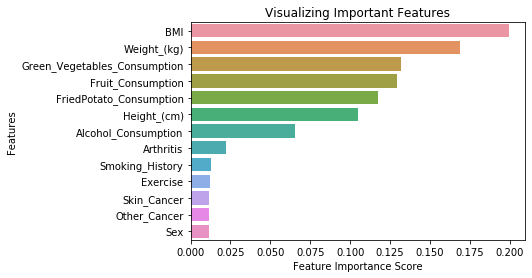

In [22]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# **17. Confusion matrix** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [23]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[93243   391]
 [ 8200    88]]


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

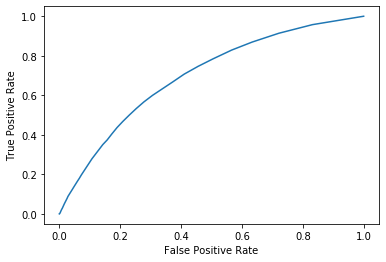

In [26]:
#define metrics
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

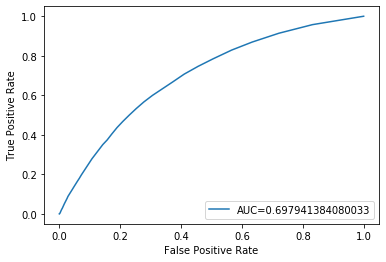

In [24]:
#define metrics
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# **18. Classification Report   sensetivity?????????** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [27]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     93634
           1       0.18      0.01      0.02      8288

    accuracy                           0.92    101922
   macro avg       0.55      0.50      0.49    101922
weighted avg       0.86      0.92      0.88    101922



In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = # ground truth labels
y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

The code below uses Scikit-Learn’s RandomizedSearchCV, which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:

n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [29]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [31]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 344}


# **19. References** <a class="anchor" id="21"></a>

[Table of Contents](#0.1)


The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Random_forest

4. https://www.datacamp.com/community/tutorials/random-forests-classifier-python

5. http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

6. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

` Masoud Imani ` is going to be the GOD of biostatistics!!
Farewell my dear friend!

[Go to Top](#0)